In [68]:
import pandas as pd
loandata = pd.read_csv('loan_data.csv')
borrowerdata = pd.read_csv('borrower_data.csv')
print(loandata.shape)
loandata.head()

(101100, 5)


loan_id loan_purpose        date  loan_granted  loan_repaid
0    19454   investment  2012-03-15             0          NaN
1   496811   investment  2012-01-17             0          NaN
2   929493        other  2012-02-09             0          NaN
3   580653        other  2012-06-27             1          1.0
4   172419     business  2012-05-21             1          0.0

In [69]:
borrowerdata.head()

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          NaN   
1   482590              0                          1.0   
2   135565              1                          NaN   
3   207797              0                          1.0   
4   828078              0                          0.0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             NaN                     8000   
1                             0.0                     4500   
2                             NaN                     6900   
3                             0.0                     1200   
4                             0.0                     6900   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.49           3285   
1                                             1.03            636   
2                                             0.82           2085   
3                                             0.82            358   
4                                             0.80           2138   

   checking_amount  is_employed  yearly_salary  age  dependent_number  
0             1073            0              0   47                 3  
1             5299            1          13500   33                 1  
2             3422            1          24500   38                 8  
3             3388            0              0   24                 1  
4             4282            1          18100   36                 1

In [70]:
data = pd.merge(loandata,borrowerdata,on='loan_id')
data.head()

loan_id loan_purpose        date  loan_granted  loan_repaid  is_first_loan  \
0    19454   investment  2012-03-15             0          NaN              1   
1   496811   investment  2012-01-17             0          NaN              1   
2   929493        other  2012-02-09             0          NaN              1   
3   580653        other  2012-06-27             1          1.0              0   
4   172419     business  2012-05-21             1          0.0              1   

   fully_repaid_previous_loans  currently_repaying_other_loans  \
0                          NaN                             NaN   
1                          NaN                             NaN   
2                          NaN                             NaN   
3                          1.0                             0.0   
4                          NaN                             NaN   

   total_credit_card_limit  avg_percentage_credit_card_limit_used_last_year  \
0                     8600                                             0.79   
1                     5300                                             0.52   
2                        0                                              NaN   
3                     5400                                             0.52   
4                     2900                                             0.76   

   saving_amount  checking_amount  is_employed  yearly_salary  age  \
0           1491             6285            1          45200   42   
1            141             5793            0              0   42   
2            660             3232            1          26500   60   
3           3345             2764            1          15800   58   
4           1050             3695            1          34800   31   

   dependent_number  
0                 7  
1                 5  
2                 4  
3                 4  
4                 4

In [71]:
data.isnull().sum()

loan_id                                                0
loan_purpose                                           0
date                                                   0
loan_granted                                           0
loan_repaid                                        53446
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
dtype: int64

In [72]:
data[data['loan_granted']==1]['loan_repaid'].value_counts()

1.0    30706
0.0    16948
Name: loan_repaid, dtype: int64

In [73]:
#fill missing avg_percentage_credit_card_limit_used_last_year = Median 

data['avg_percentage_credit_card_limit_used_last_year'] = data['avg_percentage_credit_card_limit_used_last_year'].fillna(data['avg_percentage_credit_card_limit_used_last_year'].median())
data['fully_repaid_previous_loans'] = data['fully_repaid_previous_loans'].fillna(0).astype('int64')
data['currently_repaying_other_loans'] = data['currently_repaying_other_loans'].fillna(0).astype('int64')
data.head()

loan_id loan_purpose        date  loan_granted  loan_repaid  is_first_loan  \
0    19454   investment  2012-03-15             0          NaN              1   
1   496811   investment  2012-01-17             0          NaN              1   
2   929493        other  2012-02-09             0          NaN              1   
3   580653        other  2012-06-27             1          1.0              0   
4   172419     business  2012-05-21             1          0.0              1   

   fully_repaid_previous_loans  currently_repaying_other_loans  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            1                               0   
4                            0                               0   

   total_credit_card_limit  avg_percentage_credit_card_limit_used_last_year  \
0                     8600                                             0.79   
1                     5300                                             0.52   
2                        0                                             0.73   
3                     5400                                             0.52   
4                     2900                                             0.76   

   saving_amount  checking_amount  is_employed  yearly_salary  age  \
0           1491             6285            1          45200   42   
1            141             5793            0              0   42   
2            660             3232            1          26500   60   
3           3345             2764            1          15800   58   
4           1050             3695            1          34800   31   

   dependent_number  
0                 7  
1                 5  
2                 4  
3                 4  
4                 4

In [74]:
#drop is_first_loan for avoid dummy trap
data = data.drop(['loan_id','date','is_first_loan'],axis=1)
data.head()

loan_purpose  loan_granted  loan_repaid  fully_repaid_previous_loans  \
0   investment             0          NaN                            0   
1   investment             0          NaN                            0   
2        other             0          NaN                            0   
3        other             1          1.0                            1   
4     business             1          0.0                            0   

   currently_repaying_other_loans  total_credit_card_limit  \
0                               0                     8600   
1                               0                     5300   
2                               0                        0   
3                               0                     5400   
4                               0                     2900   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                             0.79           1491   
1                                             0.52            141   
2                                             0.73            660   
3                                             0.52           3345   
4                                             0.76           1050   

   checking_amount  is_employed  yearly_salary  age  dependent_number  
0             6285            1          45200   42                 7  
1             5793            0              0   42                 5  
2             3232            1          26500   60                 4  
3             2764            1          15800   58                 4  
4             3695            1          34800   31                 4

In [75]:
#=> Split to granted/ungranted data
grantedData = data[data['loan_granted']==1]
ungrantedData = data[data['loan_granted']==0]
grantedData = grantedData.drop(['loan_granted'],axis=1)
grantedData.head()

loan_purpose  loan_repaid  fully_repaid_previous_loans  \
3            other          1.0                            1   
4         business          0.0                            0   
6         business          1.0                            1   
7  emergency_funds          0.0                            0   
8       investment          1.0                            1   

   currently_repaying_other_loans  total_credit_card_limit  \
3                               0                     5400   
4                               0                     2900   
6                               0                     7800   
7                               1                     4300   
8                               0                     3900   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
3                                             0.52           3345   
4                                             0.76           1050   
6                                             0.30           4206   
7                                             1.02            886   
8                                             0.65           1837   

   checking_amount  is_employed  yearly_salary  age  dependent_number  
3             2764            1          15800   58                 4  
4             3695            1          34800   31                 4  
6             4368            1          51100   51                 2  
7             1597            1          15000   59                 2  
8             3795            1          12000   24                 1

In [0]:
#Check outlier:
import seaborn as sns
import matplotlib.pyplot as plt

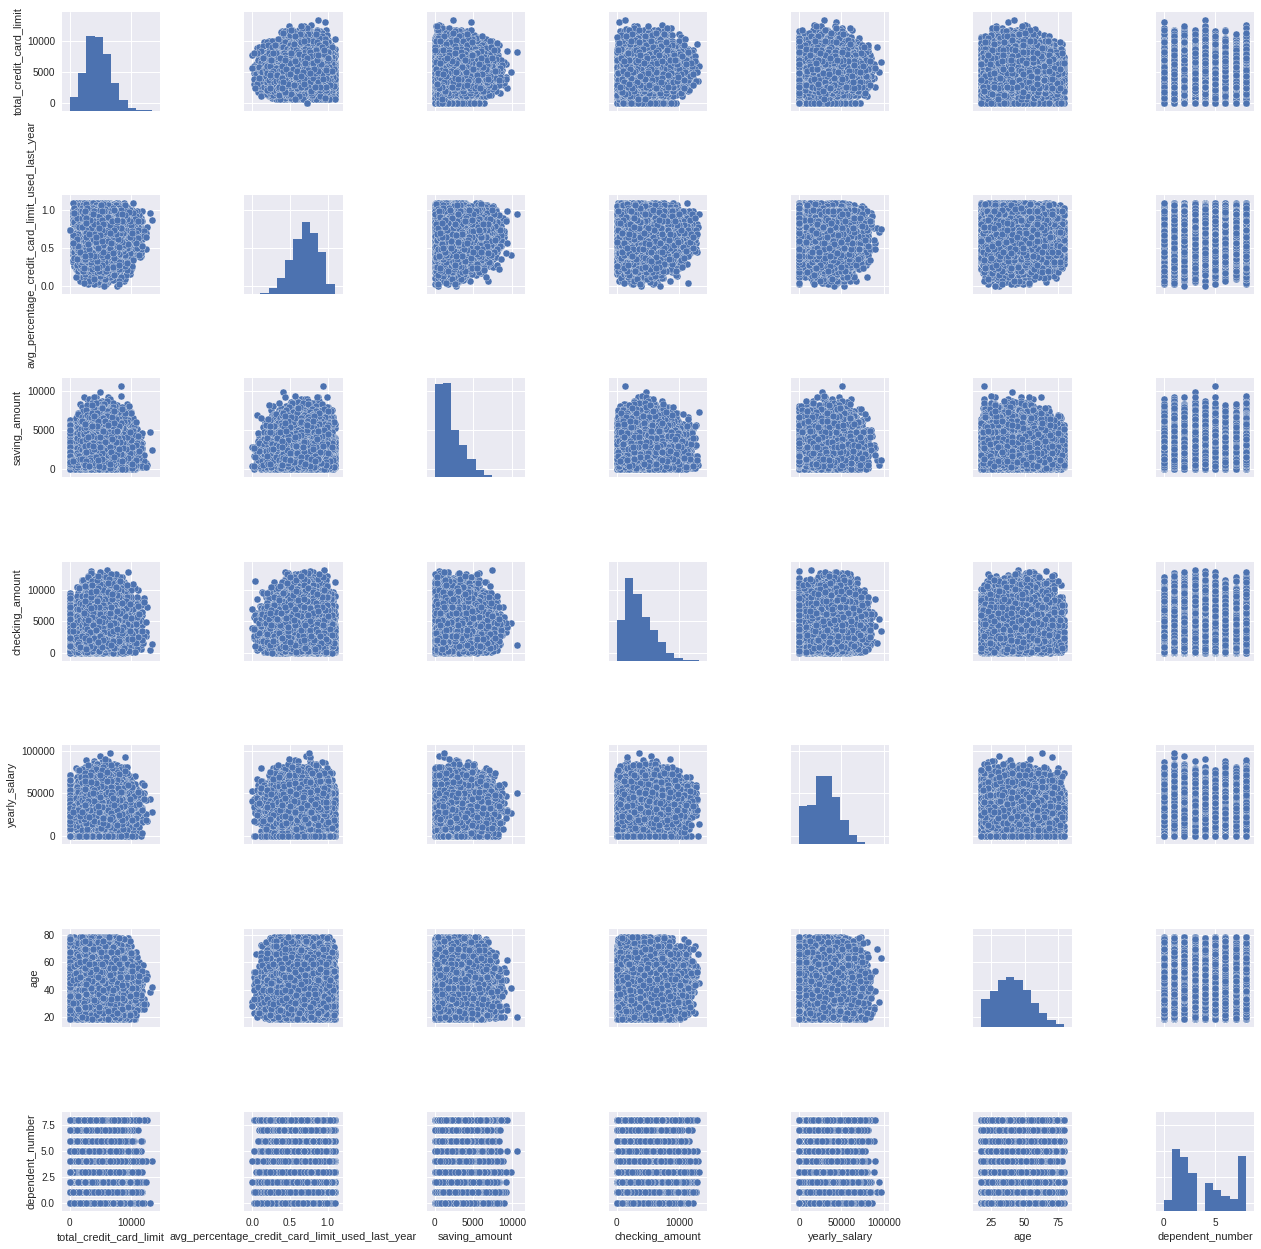

In [59]:

sns.pairplot(grantedData[['total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount','yearly_salary','age','dependent_number']])

plt.show()

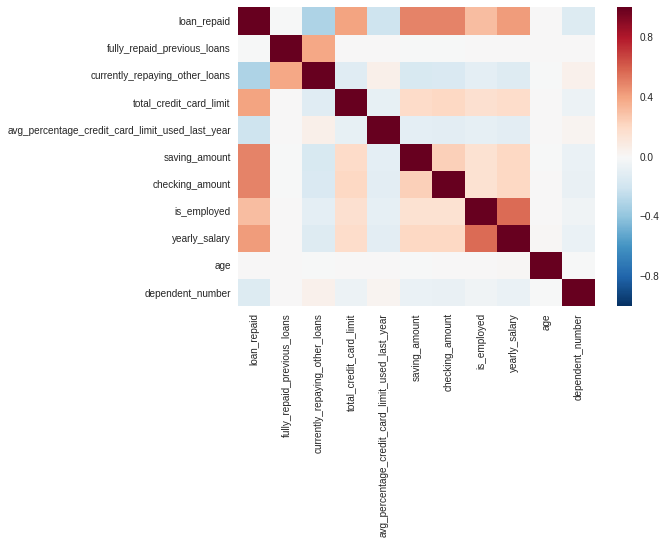

In [77]:
sns.heatmap(grantedData.corr())
# is_employed ~~ Yearly_salary

In [82]:
            
grantedData = pd.get_dummies(columns= ['loan_purpose'],data=grantedData,drop_first=True)
grantedData.head()

loan_repaid  fully_repaid_previous_loans  currently_repaying_other_loans  \
3          1.0                            1                               0   
4          0.0                            0                               0   
6          1.0                            1                               0   
7          0.0                            0                               1   
8          1.0                            1                               0   

   total_credit_card_limit  avg_percentage_credit_card_limit_used_last_year  \
3                     5400                                             0.52   
4                     2900                                             0.76   
6                     7800                                             0.30   
7                     4300                                             1.02   
8                     3900                                             0.65   

   saving_amount  checking_amount  is_employed  yearly_salary  age  \
3           3345             2764            1          15800   58   
4           1050             3695            1          34800   31   
6           4206             4368            1          51100   51   
7            886             1597            1          15000   59   
8           1837             3795            1          12000   24   

   dependent_number  loan_purpose_emergency_funds  loan_purpose_home  \
3                 4                             0                  0   
4                 4                             0                  0   
6                 2                             0                  0   
7                 2                             1                  0   
8                 1                             0                  0   

   loan_purpose_investment  loan_purpose_other  
3                        0                   1  
4                        0                   0  
6                        0                   0  
7                        0                   0  
8                        1                   0

In [0]:
from sklearn.model_selection import train_test_split

y = grantedData['loan_repaid']
X = grantedData.drop(['loan_repaid'],axis=1)

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# from sklearn.preprocessing import StandardScaler

# stdsc = StandardScaler()
# X_train_std = stdsc.fit_transform(X_train)
# X_test_std = stdsc.transform(X_test)

# X_train_std[:5]

# Assessing feature importance with Random Forests

In [92]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


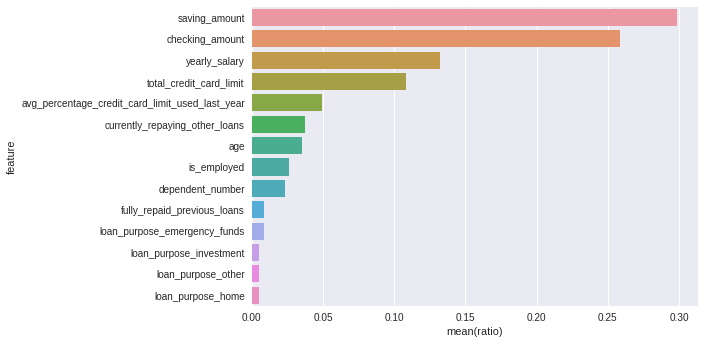

In [93]:
fImp = pd.DataFrame(X_train.columns,forest.feature_importances_).reset_index()
fImp.columns = ['ratio','feature']
fImp = fImp.sort_values('ratio',ascending=False)
sns.barplot(x =fImp['ratio'],y=fImp['feature'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


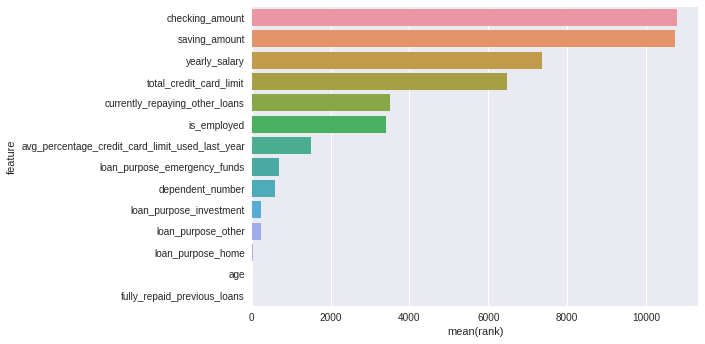

In [94]:
# Show Feature Ranking

from sklearn.feature_selection import f_regression
ffs = f_regression(X_train,y_train)
rankinfo = ffs[0]


fearank = pd.DataFrame(rankinfo,X_train.columns).reset_index()
fearank.columns =['feature','rank']
fearank = fearank.sort_values('rank',ascending=False)
fearank

sns.barplot(y=fearank['feature'],x=fearank['rank'])

#Predict if granted => repaid or not  ---- *apply ensemble learning*

In [199]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

#voting sklearn : hard / weight voting  - use diff weight for testing
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf1 = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1))
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = make_pipeline(StandardScaler(), GaussianNB())
clf4 = make_pipeline(StandardScaler(), KNeighborsClassifier(10))
clfs = [clf1,clf2,clf3,clf4]




eclf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3), ('knn', clf4)],
        voting='soft')
eclf = eclf.fit(X_train, y_train)
clfs.append(eclf)
clf_labels = ['Log Regression','Random Forest','Naive Bayes','KNN','Ensemble - Soft Voting']
for clf, label in zip(clfs, clf_labels):
  scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc')
  print("%0.4f (+/- %0.5f) [%s]"% (scores.mean(), scores.std(), label))

0.9656 (+/- 0.00248) [Log Regression]
0.9734 (+/- 0.00207) [Random Forest]
0.9600 (+/- 0.00196) [Naive Bayes]
0.9602 (+/- 0.00224) [KNN]
0.9726 (+/- 0.00179) [Ensemble - Soft Voting]


#Evaluating and tuning the ensemble classifier -

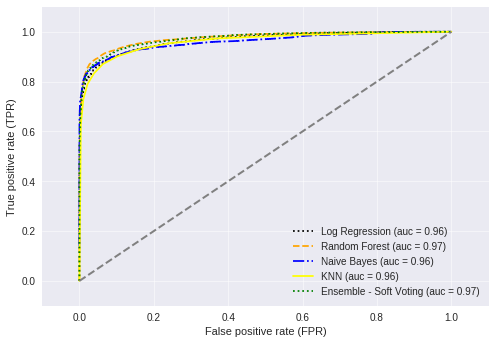

In [186]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue','yellow', 'green']
linestyles = [':', '--', '-.', '-',':']
for clf, label, clr, ls in zip(clfs, clf_labels, colors, linestyles):
  # assuming the label of the positive class is 1
  y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
  roc_auc = auc(x=fpr, y=tpr)
  plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
#plt.savefig('images/04_04', dpi=300)
plt.show()

# Bagging - Building an ensemble of classifiers from bootstrap samples

In [0]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=None,random_state=1)
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        max_samples=1.0,
                        max_features=1.0,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

In [191]:
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)
tree_y_train_pred = tree.predict(X_train)
tree_y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, tree_y_train_pred)
tree_test = accuracy_score(y_test, tree_y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
bag_y_train_pred = bag.predict(X_train)
bag_y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, tree_y_train_pred)
bag_test = accuracy_score(y_test, tree_y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f'% (bag_train, bag_test))

Decision tree train/test accuracies 1.000/0.886
Bagging train/test accuracies 1.000/0.886


In [0]:
#=> not imporved ???

#Leveraging weak learners via adaptive boosting

In [192]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'% (tree_train, tree_test))
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f'
% (ada_train, ada_test))

Decision tree train/test accuracies 0.727/0.726
AdaBoost train/test accuracies 0.924/0.925


#compare bank profitability vs your model profitability

In [194]:
ungrantedData = ungrantedData.drop(columns=['loan_granted','loan_repaid'],axis=1)
ungrantedData.head()

loan_purpose  fully_repaid_previous_loans  currently_repaying_other_loans  \
0   investment                            0                               0   
1   investment                            0                               0   
2        other                            0                               0   
5        other                            0                               0   
9     business                            1                               1   

   total_credit_card_limit  avg_percentage_credit_card_limit_used_last_year  \
0                     8600                                             0.79   
1                     5300                                             0.52   
2                        0                                             0.73   
5                     3000                                             0.82   
9                     1000                                             1.09   

   saving_amount  checking_amount  is_employed  yearly_salary  age  \
0           1491             6285            1          45200   42   
1            141             5793            0              0   42   
2            660             3232            1          26500   60   
5           1028             3269            0              0   45   
9            134             1408            0              0   36   

   dependent_number  
0                 7  
1                 5  
2                 4  
5                 3  
9                 2

In [195]:
ungrantedData = pd.get_dummies(columns= ['loan_purpose'],data=ungrantedData,drop_first=True)
ungrantedData.head()

fully_repaid_previous_loans  currently_repaying_other_loans  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
5                            0                               0   
9                            1                               1   

   total_credit_card_limit  avg_percentage_credit_card_limit_used_last_year  \
0                     8600                                             0.79   
1                     5300                                             0.52   
2                        0                                             0.73   
5                     3000                                             0.82   
9                     1000                                             1.09   

   saving_amount  checking_amount  is_employed  yearly_salary  age  \
0           1491             6285            1          45200   42   
1            141             5793            0              0   42   
2            660             3232            1          26500   60   
5           1028             3269            0              0   45   
9            134             1408            0              0   36   

   dependent_number  loan_purpose_emergency_funds  loan_purpose_home  \
0                 7                             0                  0   
1                 5                             0                  0   
2                 4                             0                  0   
5                 3                             0                  0   
9                 2                             0                  0   

   loan_purpose_investment  loan_purpose_other  
0                        1                   0  
1                        1                   0  
2                        0                   1  
5                        0                   1  
9                        0                   0

In [198]:
#=> Adaboost had the best scrore
#bank profitability vs your model profitability

ada.predict(ungrantedData)

array([1., 1., 0., ..., 0., 0., 0.])